# 1. Matplotlib API
Matplotlib is a famous visualization library in Python, is the foundation for many other visualization libraries. Matplotlib along with NumPy can be considered equivalent to Matlab.

This topic focuses only on Pyplot - the most essential sub-module of Matplotlib and how to use it to build graphs of mathematical functions. For data visualization plots such as bar chart, histogram or pie chart, there are other libraries that do a better job than Matplotlib, and they will be discussed on later topics.

*Reference: [Matplotlib - Axes API](https://matplotlib.org/stable/api/axes_api.html)*

## 1.1. Plotting interfaces

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')

#### Object-oriented interface
Every plot created by Matplotlib is under the the control of two objects, `figure` and `axes`.
- A `figure` object is the whole image generated by Matplotlib, where everything is drawn on. It is a top-level object and works as a container for a number of `axes` objects.
- Each `axes` object (a pair of *axes*), usually refers to a 2-dimensional Cartesian coordinate system. It gives access to plot elements such as plots, labels, titles, text.

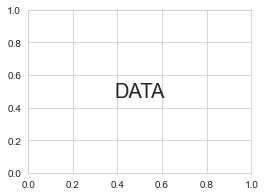

In [3]:
# create a figure
fig = plt.figure(figsize=(4,3))

# add an axes with some text
ax = fig.add_subplot()
ax.text(0.5, 0.5, 'DATA', ha='center', va='center', size=20)

plt.show()

Instead of creating `figure` and `axes` independently, Matplotlib provides a single function `subplots` creates the two objects at once. This function is highly recommended in practice, and the introduction to the previous method is to clarify how `figure` and `axes` work and how they are related.

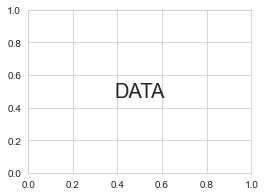

In [11]:
fig, ax = plt.subplots(figsize=(4,3))
ax.text(0.5, 0.5, 'DATA', ha='center', va='center', size=20)
plt.show()

When there is more than one *axes*, Matplotlib arranges them in a matrix of `axes` objects. Accessing each *axes* can be done using NumPy's array slicing.

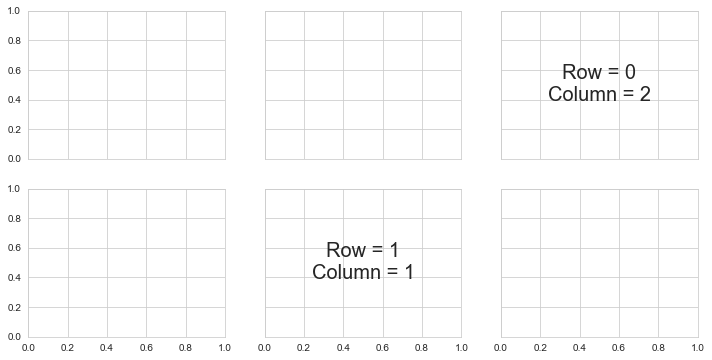

In [2]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6), sharex=True, sharey=True)
ax[0,2].text(0.5, 0.5, 'Row = 0\nColumn = 2', ha='center', va='center', size=20)
ax[1,1].text(0.5, 0.5, 'Row = 1\nColumn = 1', ha='center', va='center', size=20)
plt.show()

#### State-machine interface
Besides object-oriented interface, Matplotlib also provides another way that makes use of state-machine to create plots. When using this, the state-machine implicitly and automatically creates *figures* and *axes* to achieve the desired plot. Then a set of simple functions are used to add plot elements to the current *axes* in the current *figure*.

Comparing to object-oriented, state-machine interface is a bit more convenient for making a single *axes*, but it is not recommended for arranging multiple *axes*. Overall, object-oriented interface is still the go-to method.

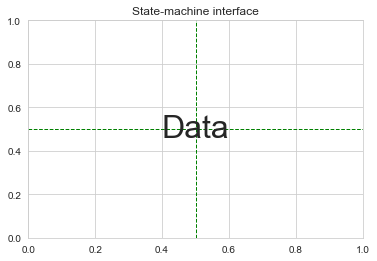

In [27]:
plt.text(0.5, 0.5, 'Data', ha='center', va='center', size=32)
plt.axvline(x=0.5, lw=1, color='g', linestyle='--')
plt.axhline(y=0.5, lw=1, color='g', linestyle='--')
plt.title('State-machine interface')
plt.show()

## 1.2. Controlling axes

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')

#### Equalizing axes
Graphs require the two axes to have the same scale.

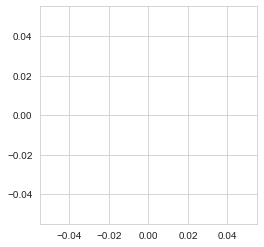

In [15]:
fig, ax = plt.subplots()

# make the two axes scaled
ax.axis('scaled')

# set tick frequencies of both axes to be 0.02
ax.xaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))

plt.show()

#### Axes limits

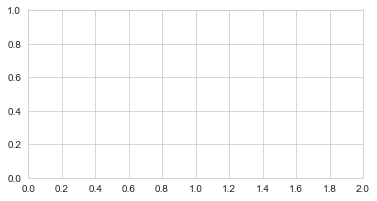

In [16]:
fig, ax = plt.subplots()
ax.axis('scaled')

# set limit for each axis
ax.set_xlim(0, 2)
ax.set_ylim(0, 1)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
plt.show()

#### Formatting axes

In [13]:
def axis_formatter(value, tick):
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 2:
        return r"$\pi$"
    elif N == -2:
        return r'$-\pi$'
    elif N % 2 == 1 and N > 0:
        return fr"$\frac{{{N}}}{{2}}\pi$"
    elif N % 2 == 1 and N < 0:
        return fr"$-\frac{{{-N}}}{{2}}\pi$"
    else:
        return fr"${N//2}\pi$"

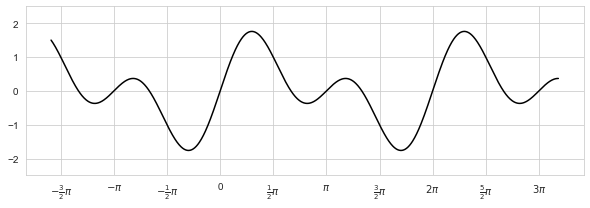

In [14]:
x = np.linspace(-5, 10, 1000)
y = np.sin(x) + np.sin(2*x)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, 'k')
ax.axis('scaled')

# set x-tick frequency to be pi/2 and apply a custom format strategy
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_major_formatter(plt.FuncFormatter(axis_formatter))

ax.set_ylim(-2.5, 2.5)
plt.show()

## 1.3. Plotting

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')

#### Graphs
Matplotlib does not really have a way to make graphs, but this can be achieved indirectly by using the `axes.plot` method. The original functionality of this function is to plot a polyline connects data points.

It has an optional parameter, `fmt` that defines basic formatting following the syntax: `'{marker}{linestyle}{color}'`. The formatting string must not stricly follow the order in the syntax, but note that the parsing may be ambiguos. The table below summarizes some useful formatting strings:

|Parameter|Character|Meaning|
|:---|:---|:---|
|`marker`|`'.'`|point marker|
|`marker`|`'o'`|big point marker|
|`linestyle`|`'-'`|solid line style|
|`linestyle`|`'--'`|dashed line style|
|`linestyle`|`':'`|dotted line style|
|`linestyle`|`'-.'`|dash-dot line style|
|`color`|`'k'`|black|
|`color`|`'r'`|red|
|`color`|`'c'`|cyan|
|`color`|`'m'`|magenta|
|`color`|`'g'`|green|

With different comnbinations of formatting strings, `axes.plot` can result in graphs (indirectly) and points (directly). In order to make graphs, the input for x-axis needs to be a dense set of values.

*Reference: [Matplotlib - matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)*

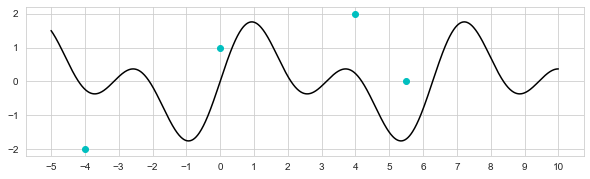

In [100]:
x1 = np.linspace(-5, 10, 1000)
y1 = np.sin(x1) + np.sin(2*x1)
x2 = np.array([0, 4, 5.5, -4])
y2 = np.array([1, 2, 0, -2])

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x1, y1, 'k')
ax.plot(x2, y2, 'oc')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()

#### Spans

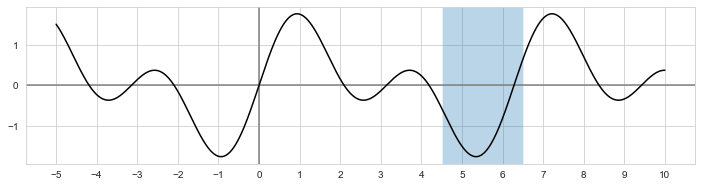

In [101]:
x = np.linspace(-5, 10, 1000)
y = np.sin(x) + np.sin(2*x)

fig, ax = plt.subplots(figsize=(12,4))

# add two lines represent the two axes
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')

# add a vertical span across y-axis
ax.axvspan(xmin=4.5, xmax=6.5, alpha=0.3)

ax.plot(x, y, 'k')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

plt.show()

#### Vectors
The `ax.quiver` method in Matplotlib allows plotting vectors. It has five important parameters, which must have the same length:
- `X` and `Y` locate the origins of vectors
- `U` and `V` define the vectors
- `color` sets vector colors

For some reasons, the following parameters must always be set in order to draw vectors correctly: `scale_units='xy'`, `angles='xy'` and `scale=1`

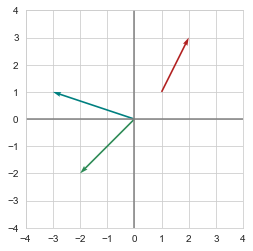

In [51]:
fig, ax = plt.subplots()
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.quiver(
    [1, 0, 0],
    [1, 0, 0],
    [1, -3, -2],
    [2, 1, -2],
    color=['firebrick', 'teal', 'seagreen'],
    scale_units='xy',
    angles='uv',
    scale=1
)
ax.axis('scaled')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
plt.show()

## 1.4. Annotations

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')

#### Text positioning
The `ax.text` method adds text to the axes at the location defined by two parameters, `x` and `y`, use true coordinate values by default. By setting `transform=ax.transAxes` (highly recommended), these two parameters is now on a *relative coordinates* where `(0,0)` is the lower-left corner and `(1,1)` is the upper-right corner.

There is also a pair of parameters, `ha` and `va` (*horizontal/vertical alignment*), specify the relative position of the coordinates to the text box. Possible values for `ha` are `['left', 'right', 'centre']` and for `va` are `['top', 'bottom', 'center']`.

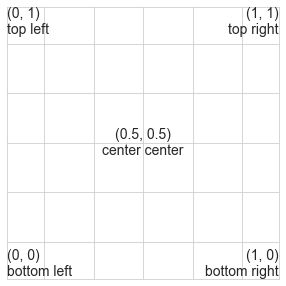

In [22]:
fig, ax = plt.subplots(figsize=(5,5))

ax.text(0.5, 0.5, '(0.5, 0.5)\ncenter center', va='center', ha='center', size=14, transform=ax.transAxes)
ax.text(0, 0, '(0, 0)\nbottom left', va='bottom', ha='left', size=14, transform=ax.transAxes)
ax.text(1, 1, '(1, 1)\ntop right', va='top', ha='right', size=14, transform=ax.transAxes)
ax.text(0, 1, '(0, 1)\ntop left', va='top', ha='left', size=14, transform=ax.transAxes)
ax.text(1, 0, '(1, 0)\nbottom right', va='bottom', ha='right', size=14, transform=ax.transAxes)

ax.axis('scaled')
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.show()

#### Plot titles

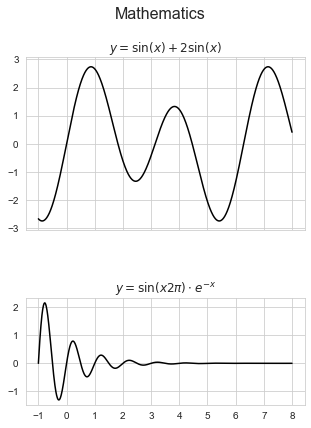

In [131]:
x = np.linspace(-1, 8, 1000)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(5,7))
fig.suptitle('Mathematics', fontsize=16)

ax[0].plot(x, np.sin(x)+2*np.sin(2*x), 'k')
ax[0].set_title('$y=\sin(x)+2\sin(x)$')
ax[0].axis('equal')
ax[0].xaxis.set_major_locator(plt.MultipleLocator(1))
ax[0].yaxis.set_major_locator(plt.MultipleLocator(1))

ax[1].plot(x, np.sin(x*2*np.pi)*np.exp(-x), 'k')
ax[1].set_title('$y=\sin(x2\pi)\cdot e^{-x}$')
ax[1].axis('scaled')
ax[1].xaxis.set_major_locator(plt.MultipleLocator(1))
ax[1].yaxis.set_major_locator(plt.MultipleLocator(1))

plt.show()

#### Axis labels

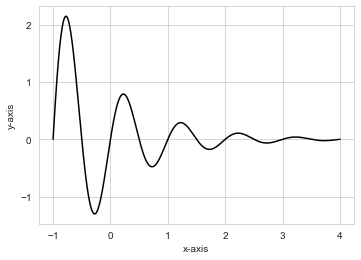

In [115]:
x = np.linspace(-1, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x*2*np.pi)*np.exp(-x), 'k')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

# set axis labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

plt.show()

#### Legends
The `ax.legend` method takes a list of plot names, which is indexed the same as the number of `ax.plot` methods called. It can also use the value of `label` parameter in each `ax.plot` method to generate the legend.

By default, Matplotlib automatically determines the best location for the legend inside the plot. This can be changed using the parameter `loc`, which specifies locations using strings such as `"lower center"` and `"upper right"`. When there is no optimized location like in the example below, the legend should be placed outside of the axes. This can be achieved using `bbox_to_anchor` a longside with `loc`; this pair of parameters behave exactly the same as text positioning.

Another useful configuration is the `ncol` parameter. It specifies the number of columns in the grid of legend labels.

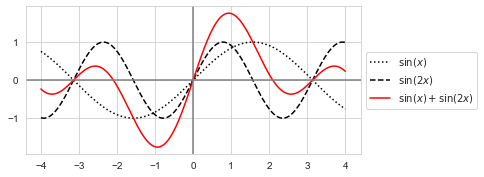

In [2]:
x = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), ':k')
ax.plot(x, np.sin(2*x), '--k')
ax.plot(x, np.sin(x)+np.sin(2*x), 'r')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')

# pass the list of labels into the ax.legend method
ax.legend(['$\sin(x)$', '$\sin(2x)$', '$\sin(x)+\sin(2x)$'], bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

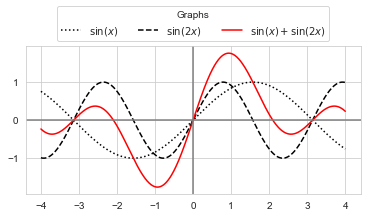

In [40]:
x = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), ':k', label='$\sin(x)$')
ax.plot(x, np.sin(2*x), '--k', label='$\sin(2x)$')
ax.plot(x, np.sin(x)+np.sin(2*x), 'r', label='$\sin(x)+\sin(2x)$')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')
ax.legend(bbox_to_anchor=(0.5, 1), loc='lower center', ncol=3, title='Graphs')

plt.show()

## 1.5. Themes and colors

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')

#### Themes
Matplotlib supports a variety of themes such as `"ggplot"`, `"seaborn"` and `"tableau-colorblind10"` inspired by other popular visualization tools. However, drawing graphs requires a white background, then `"seaborn-whitegrid"` is the most suitable theme.

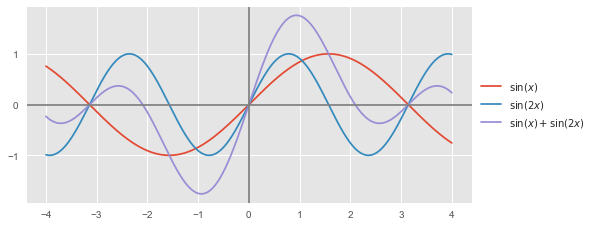

In [14]:
plt.style.use('ggplot')

x = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.sin(2*x))
ax.plot(x, np.sin(x)+np.sin(2*x))
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')
ax.legend(['$\sin(x)$', '$\sin(2x)$', '$\sin(x)+\sin(2x)$'], bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

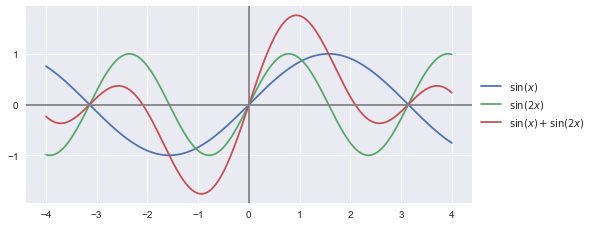

In [17]:
plt.style.use('seaborn')

x = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.sin(2*x))
ax.plot(x, np.sin(x)+np.sin(2*x))
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')
ax.legend(['$\sin(x)$', '$\sin(2x)$', '$\sin(x)+\sin(2x)$'], bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

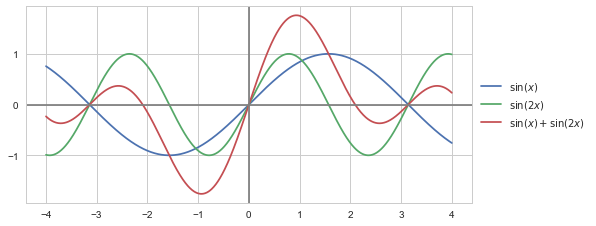

In [18]:
plt.style.use('seaborn-whitegrid')

x = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.sin(2*x))
ax.plot(x, np.sin(x)+np.sin(2*x))
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')
ax.legend(['$\sin(x)$', '$\sin(2x)$', '$\sin(x)+\sin(2x)$'], bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

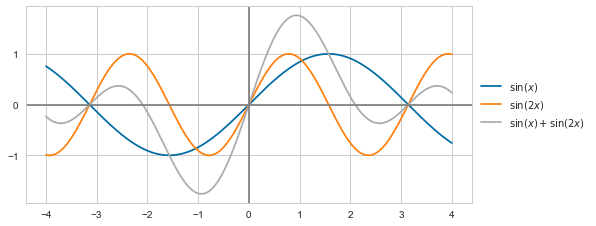

In [19]:
plt.style.use('tableau-colorblind10')

x = np.linspace(-4, 4, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.sin(2*x))
ax.plot(x, np.sin(x)+np.sin(2*x))
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axhline(y=0, c='grey')
ax.axvline(x=0, c='grey')
ax.legend(['$\sin(x)$', '$\sin(2x)$', '$\sin(x)+\sin(2x)$'], bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()

#### Built-in Matplotlib colors
Beside themes, Matplotlib also provides a collection of colors for better visualization. Some nice colors are: `dimgrey`, `indianred`, `tomato`, `goldenrod`, `seagreen`, `teal`, `darkturquoise`, `darkslategrey`, `slategrey`, `royalblue`, `rebeccapurple`.

<img src='image/matplotlib_color_names.png' style='height:700px; margin: 0 auto;'>

# 2. Mathematical functions
In Mathematics, a *function* (usually denoted $f$) is a process of transforming each given *input* number (denoted $x$) to exactly one *output* number (denoted $y$). This process can be in the form of a *mathematical formula* or some *logical rules* and can be expressed using the notation:

$$y=f(x)$$

The set of inputs and the set of outputs is called the *domain* (denoted $X$) and *codomain* (denoted $Y$), consecutively. The *function* in this context is written as $f\colon X\to Y$.

The set of all pairs $(x,y)$, formally denoted $G=\{(x,y)\mid x\in X\}$ is called the *graph* of the *function*. It pupularly means the illustration of the *function* with the condition $x,y\in\mathbb{R}$.

Another related concept to *function* is *map*, which is often used as an synonym of *function*. However, from now on in this series about Data Science, *map* refers to a generalization of *function*, which extends the scope of $x$ and $y$ not to be restricted to numbers only, but can also be other data-like objects such as strings and datetime. In reality, the more common meaning of the word *map*, Google Maps for example, is actually made by *mapping* the Earth surface to a sheet of paper. The notation for *map* is:

$$f\colon x\mapsto y$$

## 2.1. Elementary functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')

#### Polynomial functions
A polynomial is a function has the following form:

$$y=a_nx^n+a_{n-1}x^{n-1}+a_{n-2}x^{n-2}+\dots+a_1x+a_0$$

where:
- $n\;(n\in\mathbb{N})$ is the degree of the function
- $n,n-1,n-2,\dots,0$ are the degrees of the corresponding monomial
- $a_n,a_{n-1},\dots,a_0\;(a_n\neq0)$ are the coefficients

Each polynomial has the domain of $x\in\mathbb{R}$ and the codomain of $y\in\mathbb{R}$. It has a maximum of $n$ solutions and maximum of $n-1$ extrema.

Popular polynomials are *linear* functions ($n=1$), *quadratic* functions ($n=2$) and *cubic* functions ($n=3$).

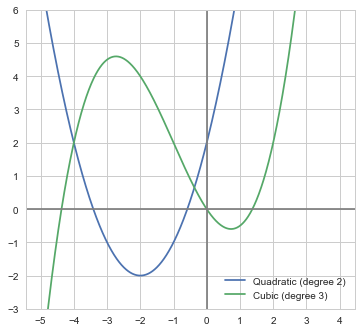

In [37]:
x = np.linspace(-5, 4, 1000)
y1 = x**2 + 4*x + 2
y2 = 1/4*x**3 + 3/4*x**2 - 3/2*x

fig, ax = plt.subplots()
ax.plot(x, y1, label='Quadratic (degree 2)')
ax.plot(x, y2, label='Cubic (degree 3)')
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_ylim(-3, 6)
ax.legend()
plt.show()

#### Exponential functions
An exponential function is a function having $x$ in its power. The form of the function is:

$$y=b^x$$

where $b\;(b>0)$ is the base.

Exponential functions have the domain of $x\in\mathbb{R}$ and the range of $y\in(0,+\infty)$. Exponential functions are monotonic, and can be either increasing or decreasing as the value of $b$ changes. All exponential functions go through the point $(0,1)$, since $b^0=1$ for any value of $b$.

Popular values of the base are $2$, $10$ and $e$. The function $e^x$ is also called the *natural* exponential function.

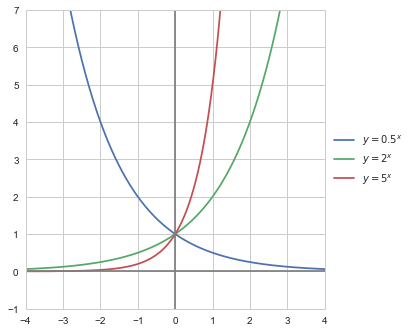

In [52]:
x = np.linspace(-5, 5, 1000)
y1 = (1/2)**x
y2 = 2**x
y3 = 5**x

fig, ax = plt.subplots()
ax.plot(x, y1, label='$y=0.5^x$')
ax.plot(x, y2, label='$y=2^x$')
ax.plot(x, y3, label='$y=5^x$')
ax.axvline(x=0, c='grey')
ax.axhline(y=0, c='grey')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.axis('scaled')
ax.set_xlim(-4, 4)
ax.set_ylim(-1, 7)
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

#### Power functions
Power functions are the functions having $x$ in its base. 

#### Logarithm functions

#### Trigonometric functions

## 2.2. Function transformations

#### Translation

#### Dilation

#### Reflection

#### Rotation

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*